# Principal Component Analysis with Cancer Data

In [189]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [190]:
columns = ["Sample code number",
           "Clump Thickness",
           "Uniformity of Cell Size",
           "Uniformity of Cell Shape",
           "Marginal Adhesion",
           "Single Epithelial Cell Size",
           "Bare Nuclei",
           "Bland Chromatin",
           "Normal Nucleoli",
           "Mitoses",
           "Class"]
bc_df = pd.read_csv('breast-cancer-wisconsin.data.txt', names= columns)
bc_df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [191]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done



# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [192]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [193]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [194]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [195]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

bc_df[bc_df.isnull().any(axis=1)]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [196]:
# No missing values found. So let us try to remove ? from bare nuclei column
bc_df = bc_df.replace('?', np.nan)
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('float64') 
# Get count of rows having ?


In [197]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
bc_df['Bare Nuclei'].fillna((bc_df['Bare Nuclei'].mean()), inplace=True)
bc_df[bc_df.isnull().any(axis=1)]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [198]:
# Check for correlation of variable
bc_df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098668,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.098668,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170


In [199]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


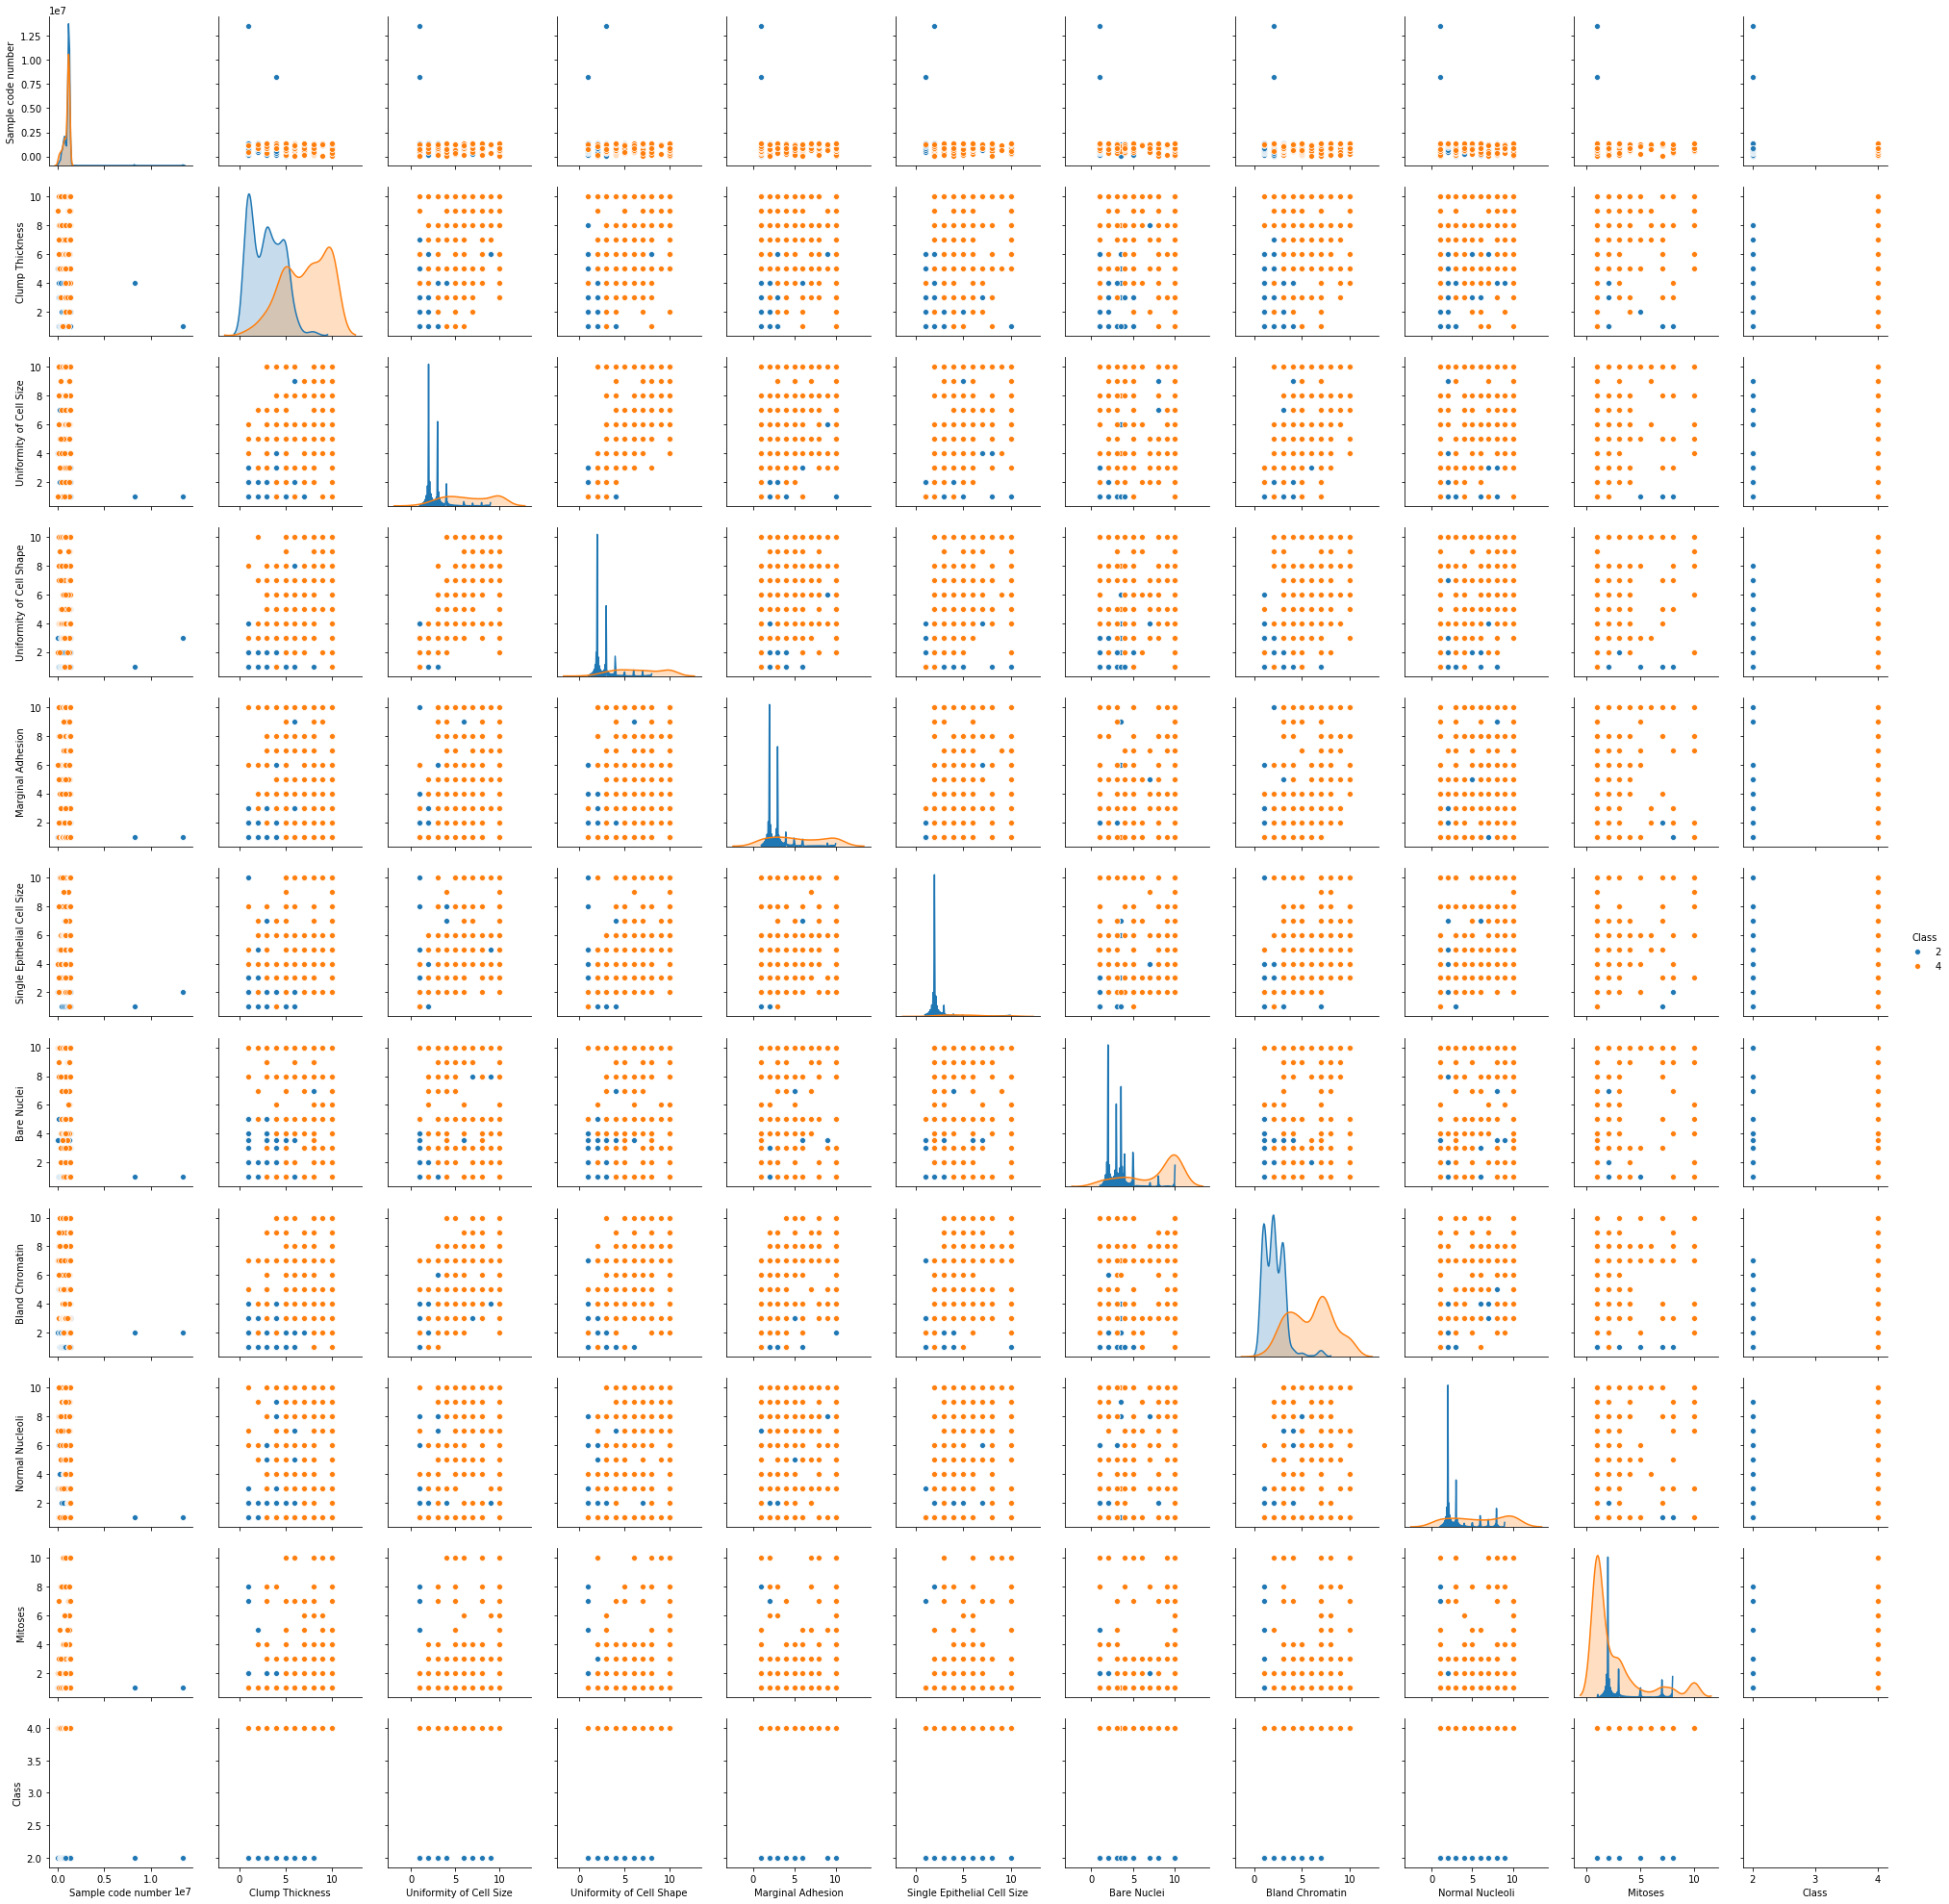

In [235]:
#Let us check for pair plots
sns.pairplot(bc_df, hue='Class')

In [201]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [202]:
# We could see most of the outliers are now removed.


In [209]:
y = bc_df.Class.values
X = bc_df.drop(['Sample code number'], axis=1)


In [210]:
X = X.drop(['Class'], axis=1)
X [10:30]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
10,1,1,1,1,1,1.000000,3,1,1
11,2,1,1,1,2,1.000000,2,1,1
12,5,3,3,3,2,3.000000,4,4,1
13,1,1,1,1,2,3.000000,3,1,1
14,8,7,5,10,7,9.000000,5,5,4
15,7,4,6,4,6,1.000000,4,3,1
16,4,1,1,1,2,1.000000,2,1,1
17,4,1,1,1,2,1.000000,3,1,1
18,10,7,7,6,4,10.000000,4,1,2
19,6,1,1,1,2,1.000000,3,1,1


In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

# Q6 Create a covariance matrix for identifying Principal components

In [212]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[1.00179211 0.6325921  0.65157657 0.47939997 0.51832491 0.58603556
  0.56032811 0.52091612 0.34125408]
 [0.6325921  1.00179211 0.90907327 0.70565089 0.74024821 0.6841925
  0.76427089 0.70208161 0.45618614]
 [0.65157657 0.90907327 1.00179211 0.66924716 0.71319109 0.69785219
  0.7412162  0.70079537 0.43985716]
 [0.47939997 0.70565089 0.66924716 1.00179211 0.58760416 0.64262156
  0.64728879 0.59964334 0.43861931]
 [0.51832491 0.74024821 0.71319109 0.58760416 1.00179211 0.58158411
  0.62467713 0.6244413  0.48521853]
 [0.58603556 0.6841925  0.69785219 0.64262156 0.58158411 1.00179211
  0.68103668 0.56292534 0.34750038]
 [0.56032811 0.76427089 0.7412162  0.64728879 0.62467713 0.68103668
  1.00179211 0.66512433 0.35509822]
 [0.52091612 0.70208161 0.70079537 0.59964334 0.6244413  0.56292534
  0.66512433 1.00179211 0.42487013]
 [0.34125408 0.45618614 0.43985716 0.43861931 0.48521853 0.34750038
  0.35509822 0.42487013 1.00179211]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [213]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
#e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30161945 -0.21046337  0.01820731 -0.84611582  0.01679262 -0.16882719
   0.22252906  0.24014125 -0.11187392]
 [-0.38141221 -0.06826013  0.73457463  0.05522372 -0.15560308  0.17184861
  -0.31182365  0.18369859  0.34998902]
 [-0.37739114 -0.10148816 -0.66577541 -0.0219649  -0.16455176  0.14260785
  -0.47597217  0.12091445  0.33904666]
 [-0.3308684   0.03305243 -0.06919598  0.38692819  0.51762281 -0.12966547
   0.15834988  0.6305178  -0.16600675]
 [-0.3368281   0.16400345 -0.05440835  0.08508124 -0.37939768  0.64231757
   0.31633867  0.00496058 -0.4391371 ]
 [-0.33287777 -0.24346368  0.06207083 -0.03073445  0.54248594  0.14176639
  -0.29077082 -0.56536095 -0.32642159]
 [-0.34932048 -0.2163973  -0.06590359  0.20051207  0.00302719 -0.12639496
   0.62947466 -0.35820843  0.49604693]
 [-0.33306253  0.02646804  0.02933721  0.21287728 -0.45607966 -0.6686514
  -0.14361707 -0.13222442 -0.38597782]
 [-0.23331575  0.89774906 -0.00257288 -0.19271021  0.18505033 -0.09526463
  -0.0118

# Q8 Find variance and cumulative variance by each eigen vector

In [214]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.95720543  73.55137655  79.55434282  84.73956786  89.0292003
  92.69849722  96.09063768  99.02476566 100.        ]


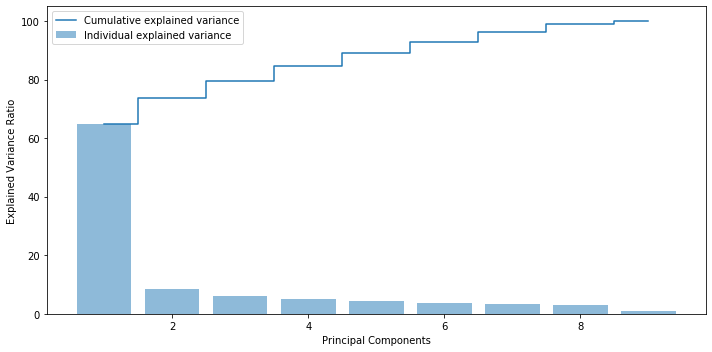

In [216]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [224]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train_sd)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2','pc3'])
principalDf [15:25]

,pc1,pc2,pc3
15,-1.987706,0.278076,0.319751
16,-0.795985,0.290169,-0.457979
17,-1.754314,0.169517,0.012824
18,-1.730761,0.070151,-0.043824
19,-2.070938,0.253222,0.562660
20,4.599343,-1.341805,1.431279
21,-1.811693,0.177401,0.781636
22,-1.880921,0.203564,0.020193
23,-1.715969,0.016604,0.044708
24,-1.395614,-0.206932,-0.853965


# Q10 Find correlation between components and features

In [233]:
pca_comp_feat = pd.DataFrame(pca.components_)
pca_comp_feat

,0,1,2,3,4,5,6,7,8
0,0.301619,0.381412,0.377391,0.330868,0.336828,0.332878,0.349320,0.333063,0.233316
1,-0.210463,-0.068260,-0.101488,0.033052,0.164003,-0.243464,-0.216397,0.026468,0.897749
2,-0.846116,0.055224,-0.021965,0.386928,0.085081,-0.030734,0.200512,0.212877,-0.192710


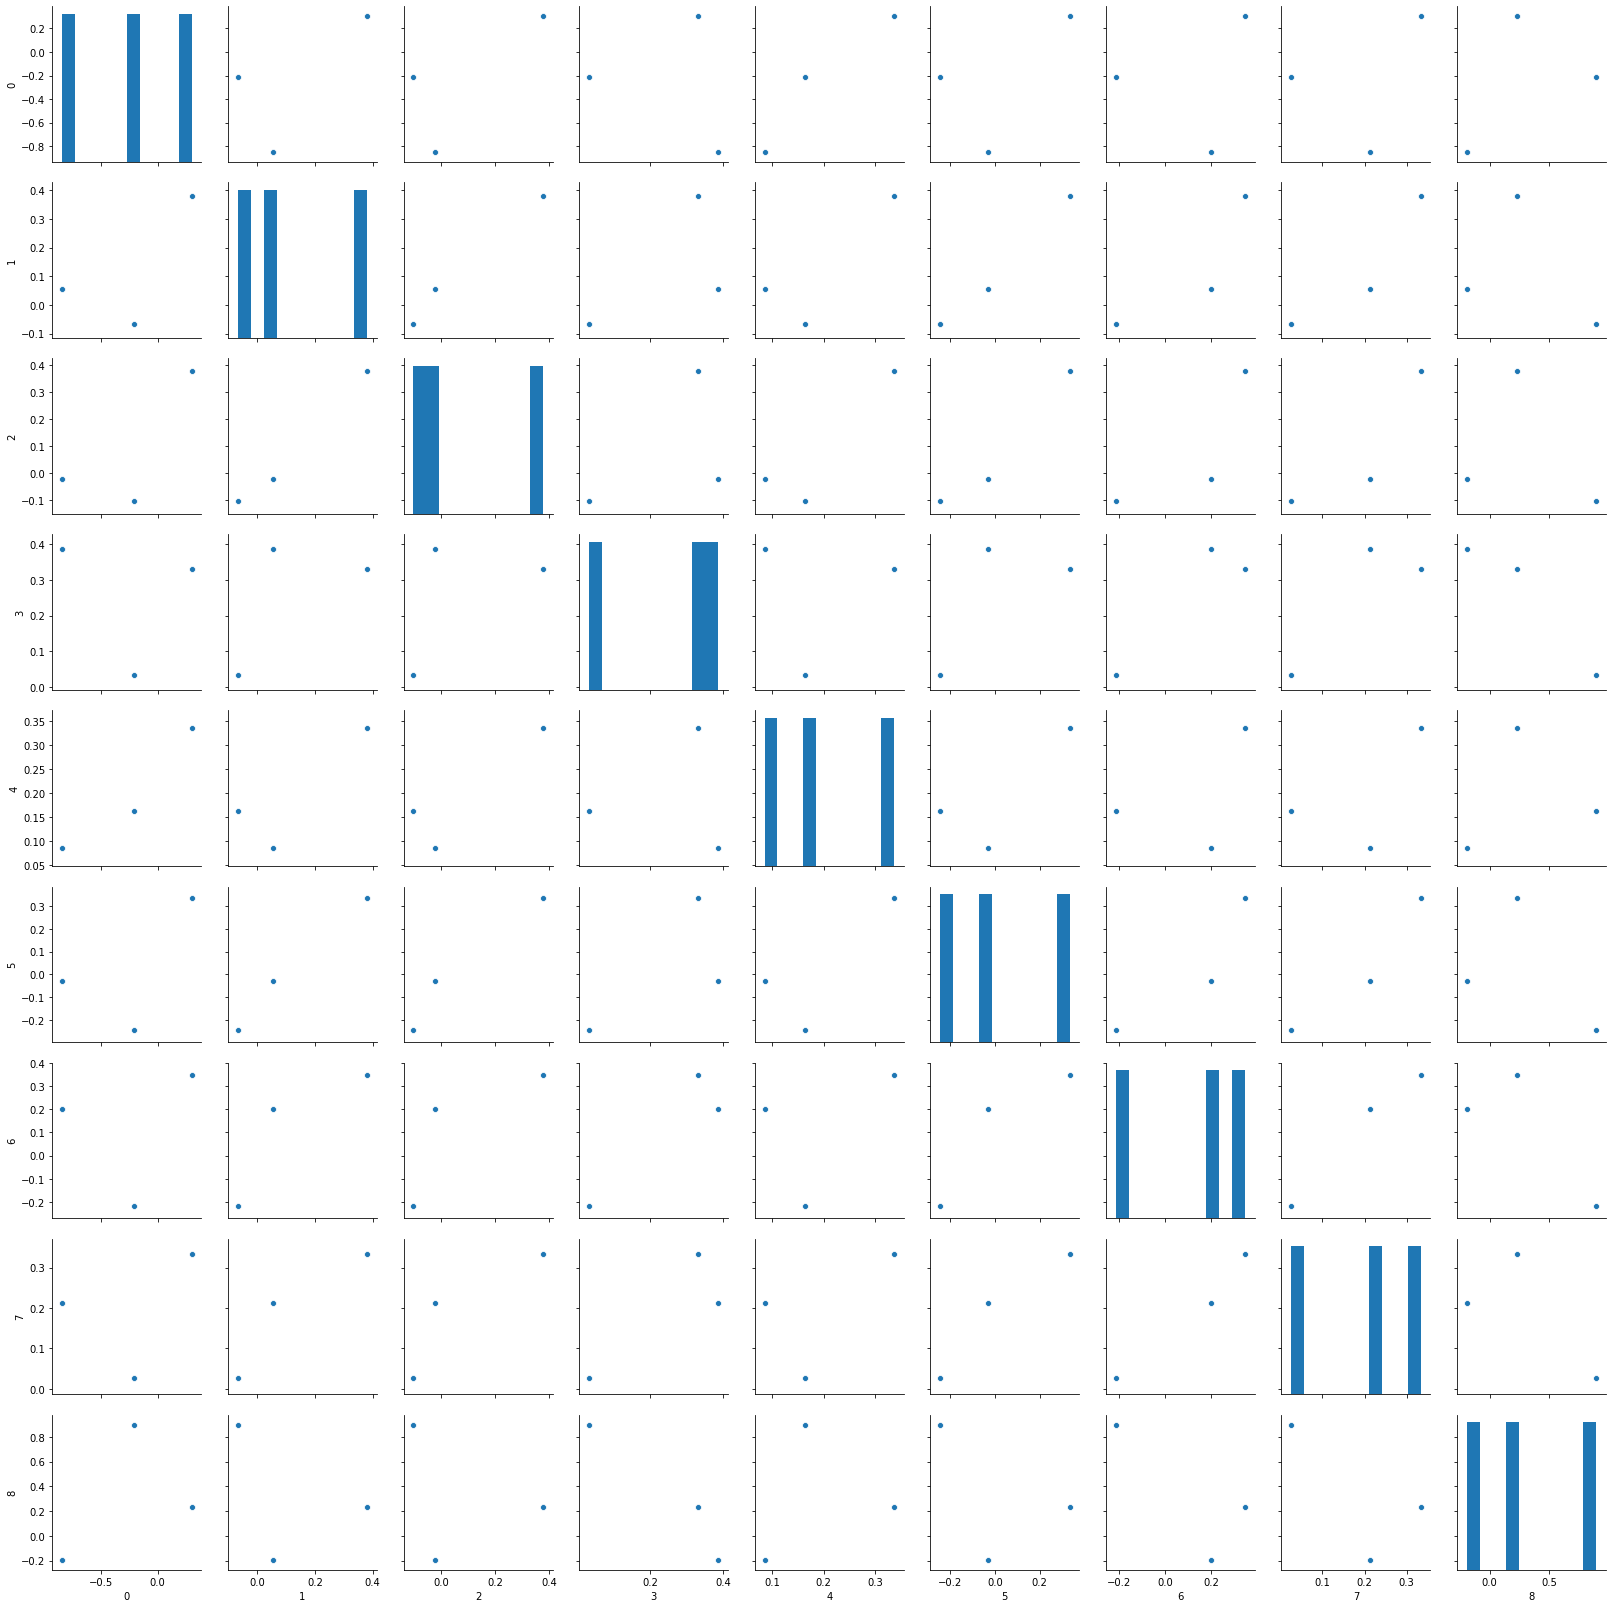

In [234]:
sns.pairplot(pca_comp_feat)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [245]:
ratings_data = pd.read_csv("jokes.csv")  
ratings_data.head() 

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [253]:
ratings = ratings_data.iloc[0:200,1:]
ratings [5:15]

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
10,-2.91,4.08,99.00,99.00,-5.73,99.00,2.48,-5.29,99.00,1.46,...,99.00,6.17,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
11,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,-1.36,...,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66
12,99.00,99.00,99.00,99.00,5.87,99.00,5.58,0.53,99.00,7.14,...,99.00,99.00,7.52,99.00,99.00,99.00,99.00,99.00,99.00,99.00
13,9.22,9.27,9.22,8.30,7.43,0.44,3.50,8.16,5.97,8.98,...,8.11,-1.02,5.58,6.84,5.53,-5.92,8.20,8.98,-8.16,6.50
14,8.79,-5.78,6.02,3.69,7.77,-5.83,8.69,8.59,-5.92,7.52,...,2.72,-5.49,-8.59,8.69,-8.74,-3.01,8.30,-4.81,-2.38,-5.97


# Q22 Change the column indices from 0 to 99

In [256]:

ratings.columns = range(0,100)
ratings[10:20]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
10,-2.91,4.08,99.00,99.00,-5.73,99.00,2.48,-5.29,99.00,1.46,...,99.00,6.17,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
11,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,-1.36,...,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66
12,99.00,99.00,99.00,99.00,5.87,99.00,5.58,0.53,99.00,7.14,...,99.00,99.00,7.52,99.00,99.00,99.00,99.00,99.00,99.00,99.00
13,9.22,9.27,9.22,8.30,7.43,0.44,3.50,8.16,5.97,8.98,...,8.11,-1.02,5.58,6.84,5.53,-5.92,8.20,8.98,-8.16,6.50
14,8.79,-5.78,6.02,3.69,7.77,-5.83,8.69,8.59,-5.92,7.52,...,2.72,-5.49,-8.59,8.69,-8.74,-3.01,8.30,-4.81,-2.38,-5.97
15,-3.50,1.55,2.33,-4.13,4.22,-2.28,-2.96,-0.49,2.91,1.99,...,3.11,1.70,0.24,-5.92,7.28,-1.36,3.74,2.82,-2.86,3.45
16,99.00,-9.27,99.00,99.00,-7.38,99.00,8.74,-6.31,99.00,2.33,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
17,3.16,7.62,3.79,8.25,4.22,7.62,2.43,0.97,0.53,0.83,...,0.83,5.68,3.69,0.19,0.29,3.59,0.49,8.06,0.49,7.62
18,4.22,3.64,99.00,99.00,2.52,99.00,4.13,-5.19,99.00,7.91,...,99.00,0.05,99.00,99.00,99.00,99.00,1.65,99.00,99.00,99.00
19,99.00,7.62,99.00,99.00,-8.64,2.43,8.93,-6.60,99.00,-9.47,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [257]:
ratings.replace(99,0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [260]:
from sklearn.preprocessing import StandardScaler


ratings_diff = StandardScaler().fit_transform(ratings)


array([[-0.83401707, -0.26302556, -0.9426833 , ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.5697436 , -0.49904647, -0.60368031, ..., -1.40370926,
        -1.3580697 , -1.41633091],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       ...,
       [-0.60216707, -0.5900237 , -0.76302442, ..., -1.42660908,
        -1.25310717, -1.42999758],
       [ 1.5382259 ,  2.08184746,  1.35669652, ...,  0.70778183,
         0.7894014 ,  0.70807651],
       [-0.53643182, -0.68074099, -0.834761  , ...,  0.70778183,
         0.7894014 ,  0.70807651]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [279]:
rating_new=pd.DataFrame(ratings_diff)
#print(rating_new)
rating_new.mean().sort_values(ascending=False).head(10)

87    2.831069e-16
84    2.642331e-16
3     2.536860e-16
95    2.342571e-16
72    2.153833e-16
70    1.743050e-16
93    1.676437e-16
83    1.665335e-16
96    1.476597e-16
63    1.426637e-16
dtype: float64